In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
df=pd.read_csv("C:/Users/haris/Downloads/code and csv file excelr/linear regression/Toyoto_Corrola.csv")
df.head(10)

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,61000,90,3,4,5,1170
6,7,ÊTOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,94612,90,3,4,5,1245
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,75889,90,3,4,5,1245
8,9,ÊTOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,19700,192,3,4,5,1185
9,10,ÊTOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,71138,69,3,4,5,1105


In [4]:
data=df.drop(['Id','Model'],axis=1)

In [5]:
data

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Cylinders  1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [7]:
data.isna().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
data.shape

(1436, 8)

In [9]:
data.describe()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [10]:
data.dtypes

Price        int64
Age_08_04    int64
KM           int64
HP           int64
Doors        int64
Cylinders    int64
Gears        int64
Weight       int64
dtype: object

In [11]:
data.duplicated().sum()

1

In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [13]:
data.loc[data.duplicated(keep=False),:]

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
112,24950,8,13253,116,5,4,5,1320
113,24950,8,13253,116,5,4,5,1320


In [14]:
data.loc[data.duplicated(keep='first'),:]

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
113,24950,8,13253,116,5,4,5,1320


In [15]:
data.loc[data.duplicated(keep='last'),:]

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
112,24950,8,13253,116,5,4,5,1320


In [16]:
data.drop_duplicates(keep='first',inplace=True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.shape

(1435, 8)

In [19]:
data

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [20]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears',
       'Weight'],
      dtype='object')

In [21]:
data.count()

Price        1435
Age_08_04    1435
KM           1435
HP           1435
Doors        1435
Cylinders    1435
Gears        1435
Weight       1435
dtype: int64

In [25]:
data.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.091803,NaN,0.209642,0.087143
Doors,0.183604,-0.146929,-0.035193,0.091803,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.301734,NaN,0.021238,1.000000


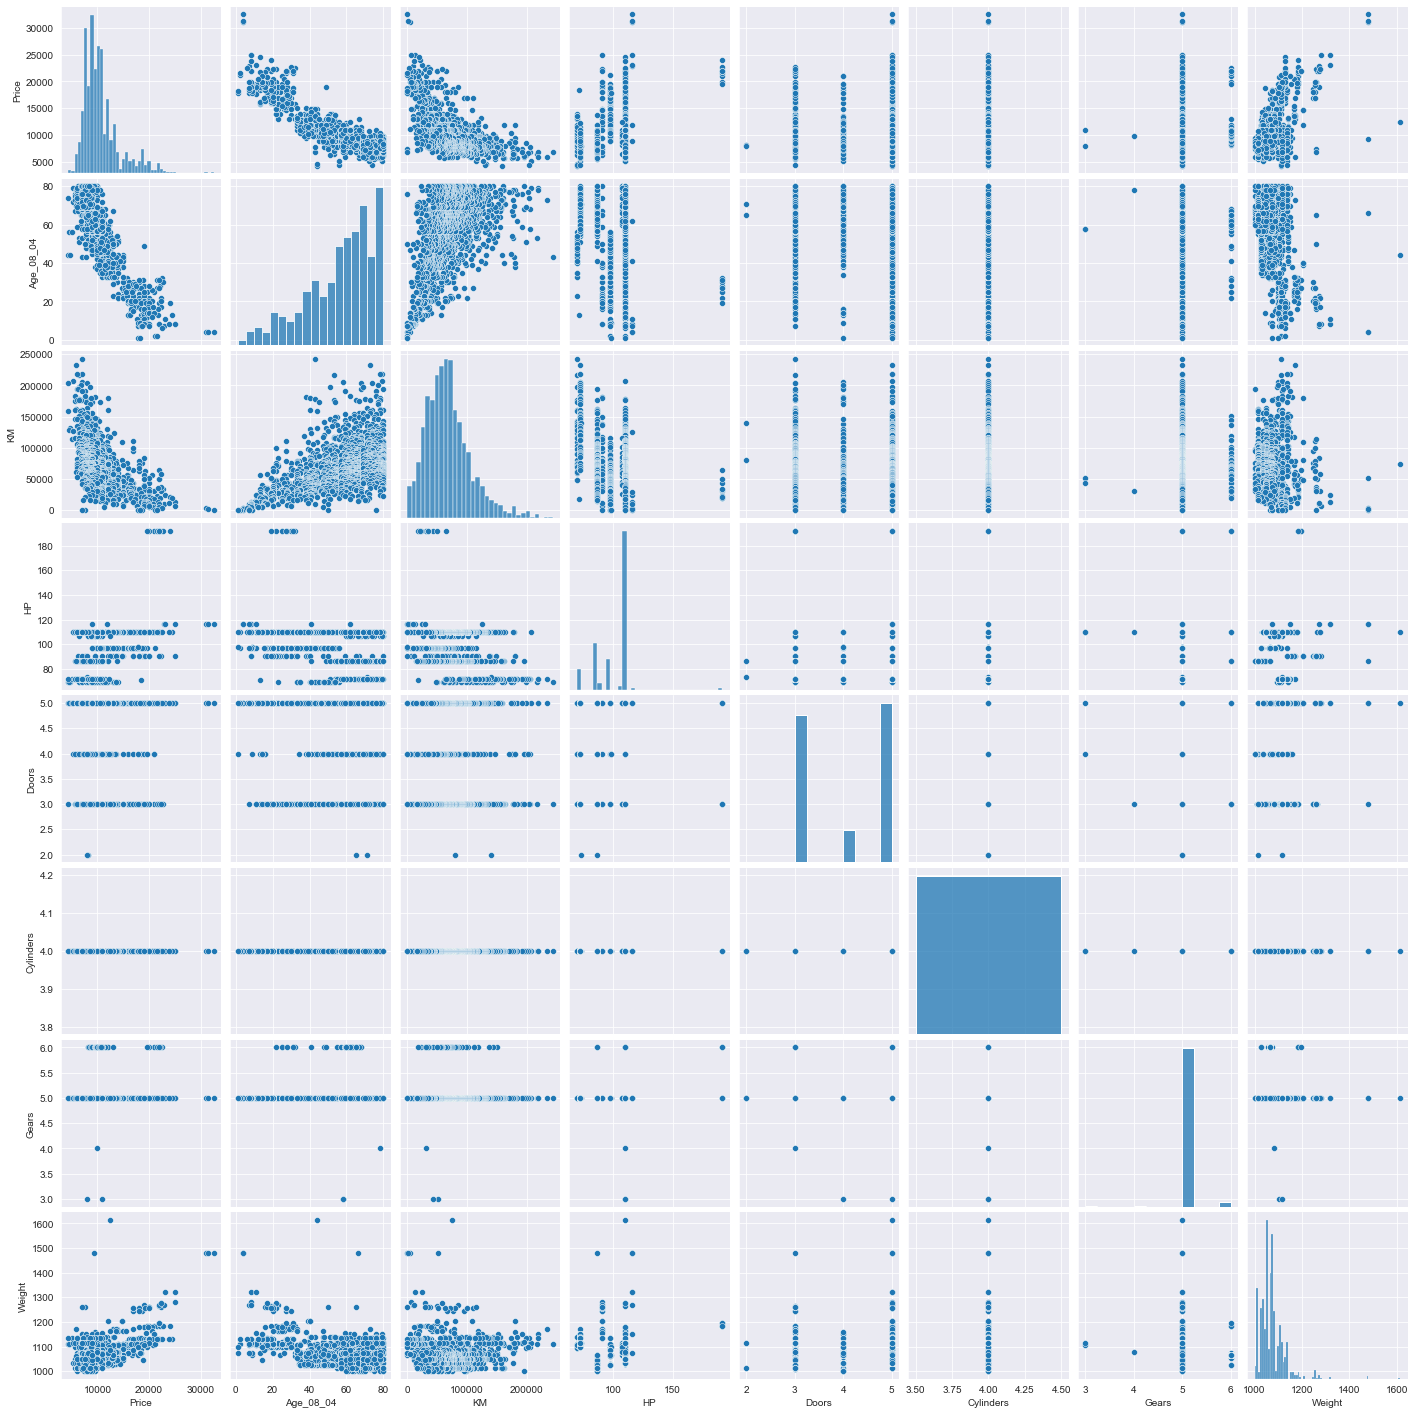

In [26]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [28]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=data).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1482.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:31:36   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -402.2934     77.293     -5.205      0.000    -553.913    -250.674
Age_08_04   -122.2882      2.614    -46.775      0.000    -127.417    -117.160
KM            -0.0199      0.001    -16.490      0.000      -0.022      -0.018
HP            28.3278      2.613     10.841      0.000      23.202      33.454
Doors         -8.7158     39.970     -0.218      0.827     -87.121      69.690
Cylinders  -1609.1735    309.171     -5.205      0.000   -2215.651   -1002.695
Gears        625.2978    197.289      3.169      0.002     238.291    1012.305
Weight        18.4551      0.834     22.142      0.000      16.820      20.090
==============================================================================
Omnibus:                      194.732   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1529.680
Skew:                          -0.360   Prob(JB):                         0.00
Kurtosis:                       8.006   Cond. No.                     3.96e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
ml_D=smf.ols('Price~Doors',data = data).fit()

In [31]:
ml_D.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           2.40e-12
Time:                        22:36:17   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
rsq_age = smf.ols('Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight',data=data).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+Doors+Cylinders+Gears+Weight',data=data).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+Doors+Cylinders+Gears+Weight',data=data).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_door = smf.ols('Doors~Age_08_04+KM+HP+Cylinders+Gears+Weight',data=data).fit().rsquared  
vif_door = 1/(1-rsq_door)

rsq_cylinder = smf.ols('Cylinders~Age_08_04+KM+HP+Doors+Gears+Weight',data=data).fit().rsquared  
vif_cylinder = 1/(1-rsq_cylinder)

rsq_gear = smf.ols('Gears~Age_08_04+KM+HP+Doors+Cylinders+Weight',data=data).fit().rsquared  
vif_gear = 1/(1-rsq_gear)

rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+Doors+Cylinders+Gears',data=data).fit().rsquared  
vif_weight = 1/(1-rsq_weight)


# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','Doors','Cylinders','Gears','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_door,vif_cylinder,vif_gear,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

C:\Users\haris\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variables,VIF
0,Age_08_04,1.866057
1,KM,1.626264
2,HP,1.214147
3,Doors,1.148708
4,Cylinders,0.000000
5,Gears,1.096575
6,Weight,1.502749


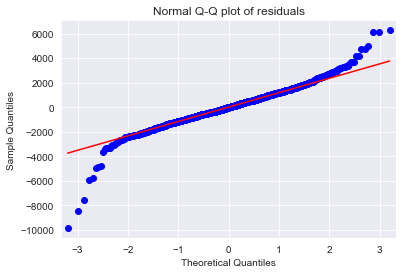

In [35]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(model.resid>5))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   48,   49,   51,   52,
          53,   56,   58,   59,   61,   62,   63,   64,   65,   66,   68,
          69,   70,   72,   74,   75,   76,   77,   78,   80,   81,   83,
          84,   85,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  117,  118,  119,  120,  122,  124,  126,  127,
         133,  135,  137,  138,  140,  141,  142,  143,  145,  146,  147,
         148,  149,  150,  151,  152,  153,  155,  156,  157,  158,  159,
         160,  161,  162,  164,  165,  166,  167,  168,  169,  170,  171,
         172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,
         189,  193,  195,  196,  200,  203,  204,  209,  210,  215,  222,
         229,  231,  232,  236,  237, 

In [37]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

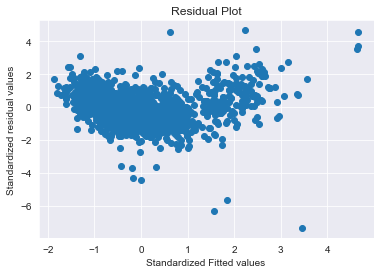

In [38]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

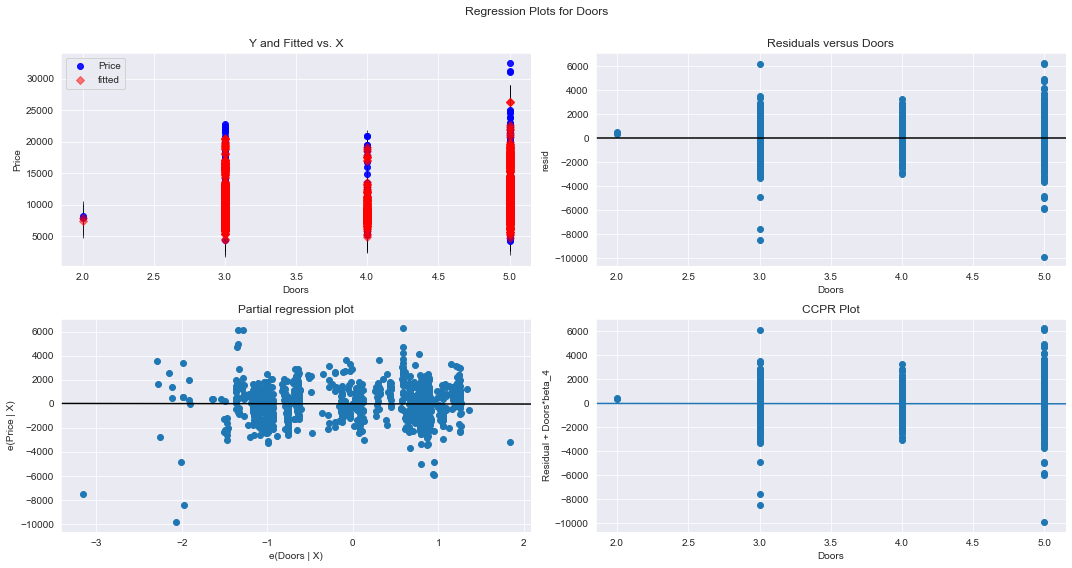

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

In [40]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

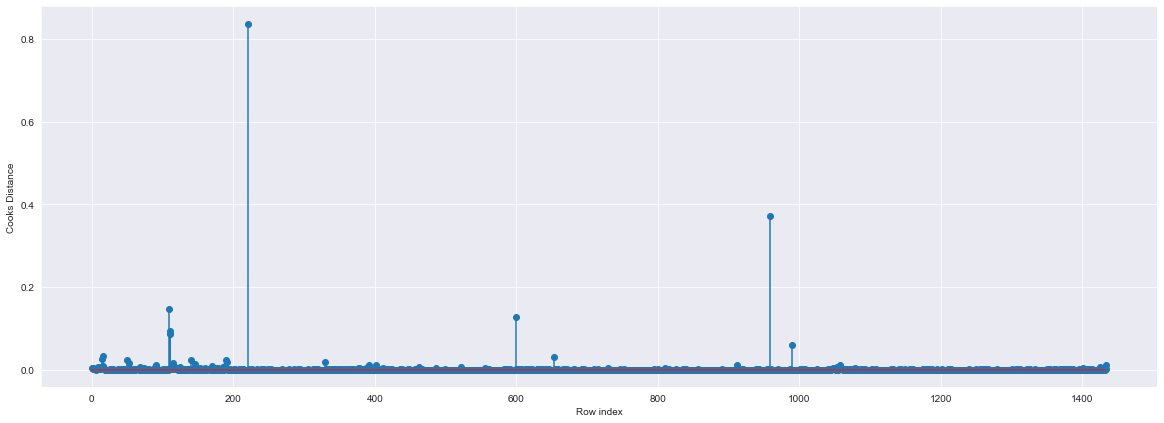

In [41]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
(np.argmax(c),np.max(c))

(220, 0.8366218414219382)

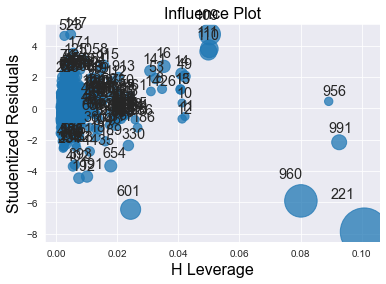

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.018815331010452963

In [46]:
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data = data).fit()

In [47]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1482.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:16:28   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -402.2934     77.293     -5.205      0.000    -553.913    -250.674
Age_08_04   -122.2882      2.614    -46.775      0.000    -127.417    -117.160
KM            -0.0199      0.001    -16.490      0.000      -0.022      -0.018
HP            28.3278      2.613     10.841      0.000      23.202      33.454
Doors         -8.7158     39.970     -0.218      0.827     -87.121      69.690
Cylinders  -1609.1735    309.171     -5.205      0.000   -2215.651   -1002.695
Gears        625.2978    197.289      3.169      0.002     238.291    1012.305
Weight        18.4551      0.834     22.142      0.000      16.820      20.090
==============================================================================
Omnibus:                      194.732   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1529.680
Skew:                          -0.360   Prob(JB):                         0.00
Kurtosis:                       8.006   Cond. No.                     3.96e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
pd.options.display.max_rows = 1435

In [52]:
data

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
5,12950,32,61000,90,3,4,5,1170
6,16900,27,94612,90,3,4,5,1245
7,18600,30,75889,90,3,4,5,1245
8,21500,27,19700,192,3,4,5,1185
9,12950,23,71138,69,3,4,5,1105


In [53]:
new_data=pd.DataFrame({'Age_08_04':40,"KM":95255,"HP":102,"Doors":4,'Cylinders':5,'Gears':6,'Weight':1265},index=[1])

In [54]:
final_ml_V.predict(new_data)

1    14714.188446
dtype: float64

In [56]:
pred_y = final_ml_V.predict(data)
pred_y

0       16562.127831
1       16044.981831
2       16544.958657
3       16175.056306
4       15967.492947
5       15274.541241
6       16600.304676
7       16606.547882
8       19875.260811
9       14378.640536
10      20510.764448
11      20635.526513
12      20496.257019
13      19945.643955
14      19601.539509
15      20397.421005
16      19223.428708
17      16402.662421
18      15587.794912
19      14819.152303
20      14753.370679
21      16548.627141
22      15500.177369
23      15981.014941
24      15986.404022
25      16423.007447
26      16056.971086
27      15675.490690
28      15743.435864
29      16157.512580
30      15569.140246
31      15918.015744
32      15419.943675
33      15478.821707
34      15802.414652
35      15273.406079
36      15754.394494
37      16297.887798
38      14891.820504
39      15459.998527
40      15641.816616
41      15129.834953
42      15683.625113
43      16452.724740
44      17266.512738
45      17744.878018
46      17071.064042
47      15291